# Final Machine Learning
### Group 3
- Catarina Oliveira | 20211616
- Joana Rosa | 20211516
- Marcelo Júnior | 20211677
- Martim Serra | 20211543

## Imports

### Importation of Libraries and Packages

In this section of the notebook, the importation of needed libraries and packages to explore the data and apply the rightful machine learning models was performed.

In [50]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
    r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
    GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.feature_selection import RFE, RFECV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV


### Importation of the Data

In [51]:
train_orig = pd.read_csv('Data/train.csv')
test_orig = pd.read_csv('Data/test.csv')
sample_submission = pd.read_csv('Data/sample_submission.csv')

---

## Datasets
---
### 1. Test Dataset

In [52]:
test = test_orig.copy()

#### 1.1. Preprocessing

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BookingID                               5974 non-null   int64  
 1   ArrivalYear                             5974 non-null   int64  
 2   ArrivalMonth                            5974 non-null   int64  
 3   ArrivalWeekNumber                       5974 non-null   int64  
 4   ArrivalDayOfMonth                       5974 non-null   int64  
 5   ArrivalHour                             5974 non-null   float64
 6   WeekendStays                            5974 non-null   int64  
 7   WeekdayStays                            5974 non-null   int64  
 8   Adults                                  5974 non-null   int64  
 9   Children                                5974 non-null   float64
 10  Babies                                  5974 non-null   int6

There are no missing values in the testing dataset.

In [54]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
BookingID,5974.0,25001.808169,8642.155342,10002.000,17526.250000,25029.50000,32425.000,39990.0000
ArrivalYear,5974.0,2016.000000,0.000000,2016.000,2016.000000,2016.00000,2016.000,2016.0000
ArrivalMonth,5974.0,6.848845,3.180767,1.000,4.000000,7.00000,9.000,12.0000
ArrivalWeekNumber,5974.0,28.825410,13.890828,1.000,17.000000,29.00000,40.000,53.0000
ArrivalDayOfMonth,5974.0,15.893539,8.902304,1.000,8.000000,16.00000,24.000,31.0000
ArrivalHour,5974.0,18.825201,2.846332,14.000,16.500000,18.75000,21.250,23.7500
WeekendStays,5974.0,0.906428,0.936158,0.000,0.000000,1.00000,2.000,16.0000
WeekdayStays,5974.0,2.259960,1.717114,0.000,1.000000,2.00000,3.000,41.0000
Adults,5974.0,1.877971,0.555333,0.000,2.000000,2.00000,2.000,4.0000
Children,5974.0,0.138433,0.448693,0.000,0.000000,0.00000,0.000,3.0000


In [55]:
test.nunique().sort_values()

ArrivalYear                                  1
CompanyReservation                           1
AffiliatedCustomer                           2
PartOfGroup                                  2
ParkingSpacesBooked                          2
OnlineReservation                            2
%PaidinAdvance                               2
Babies                                       2
FirstTimeGuest                               2
Children                                     4
OrderedMealsPerDay                           4
Adults                                       5
SpecialRequests                              6
FloorReserved                                7
FloorAssigned                                8
PreviousCancellations                        9
WeekendStays                                11
ArrivalMonth                                12
BookingChanges                              13
WeekdayStays                                22
ArrivalDayOfMonth                           31
PreviousStays

Variables `Arrival Year` and `CompanyReservation` are constants. Therefore, they should not be considered in the feature selection process and will be dropped out of the testing dataset futher on in the document.

In [56]:
test.drop(['ArrivalYear', 'CompanyReservation'],axis = 1, inplace = True)

In [57]:
test[test.duplicated() == True]

,BookingID,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)


There are no duplicate values in the testing dataset.

In [58]:
test[test['BookingID'].duplicated()]

,BookingID,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)


There are no duplicate values in the `BookingID` variable, in the testing dataset. This means that there are no duplicate bookings being analysed. Therefore, it is now possible to set `BookingID` as the index of the testing dataset.

In [59]:
test.set_index(['BookingID'], inplace = True)
# calls the head of the dataset (just to verify the set_index() was performed correctly)
test.head(10)

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,,,,,,,,,,,,
22924,12,50,8,20.00,0,1,1,0.0,0,0,...,0,1,6,6,67.00,66.3300,0.0,28742.44,29668.86,0.842
18452,7,31,29,19.25,0,1,2,0.0,0,1,...,0,0,6,6,109.00,107.9100,0.0,1291.75,1354.39,0.432
27761,10,41,4,20.75,0,2,2,1.0,0,1,...,0,1,6,3,169.00,167.3100,0.0,36194.87,36909.33,0.876
25345,11,47,15,23.50,0,4,2,0.0,0,1,...,0,1,6,6,88.40,87.5160,0.0,36194.87,36909.33,0.876
28561,9,38,16,19.00,0,2,2,0.0,0,1,...,0,1,6,6,130.00,128.7000,0.0,28742.44,29668.86,0.842
34167,5,21,19,17.75,0,1,2,0.0,0,1,...,0,0,6,6,103.50,102.4650,0.0,13446.40,14455.00,0.743
33031,3,10,1,18.75,0,4,2,0.0,0,1,...,0,2,6,6,92.53,91.6047,0.0,7199.25,7096.60,0.572
27401,10,44,25,19.50,0,4,2,1.0,0,1,...,0,1,6,6,149.00,147.5100,0.0,40141.59,40833.24,0.898
36399,3,13,25,22.00,1,2,2,0.0,0,1,...,0,1,3,3,105.30,104.2470,0.0,36194.87,36909.33,0.876


#### 1.2. Data Visualization

**Histograms**

In [60]:
hist_test = test.drop(['WeekendStays', 'WeekdayStays', 'Adults', 'Children', 'Babies', 'ParkingSpacesBooked',
     'SpecialRequests', 'OrderedMealsPerDay', 'FloorAssigned', 'FloorReserved', '%PaidinAdvance', 'FirstTimeGuest',
     'AffiliatedCustomer', 'OnlineReservation', 'PartOfGroup', 'PreviousStays',
     'PreviousReservations', 'PreviousCancellations', 'DaysUntilConfirmation', 'BookingChanges'], axis=1)

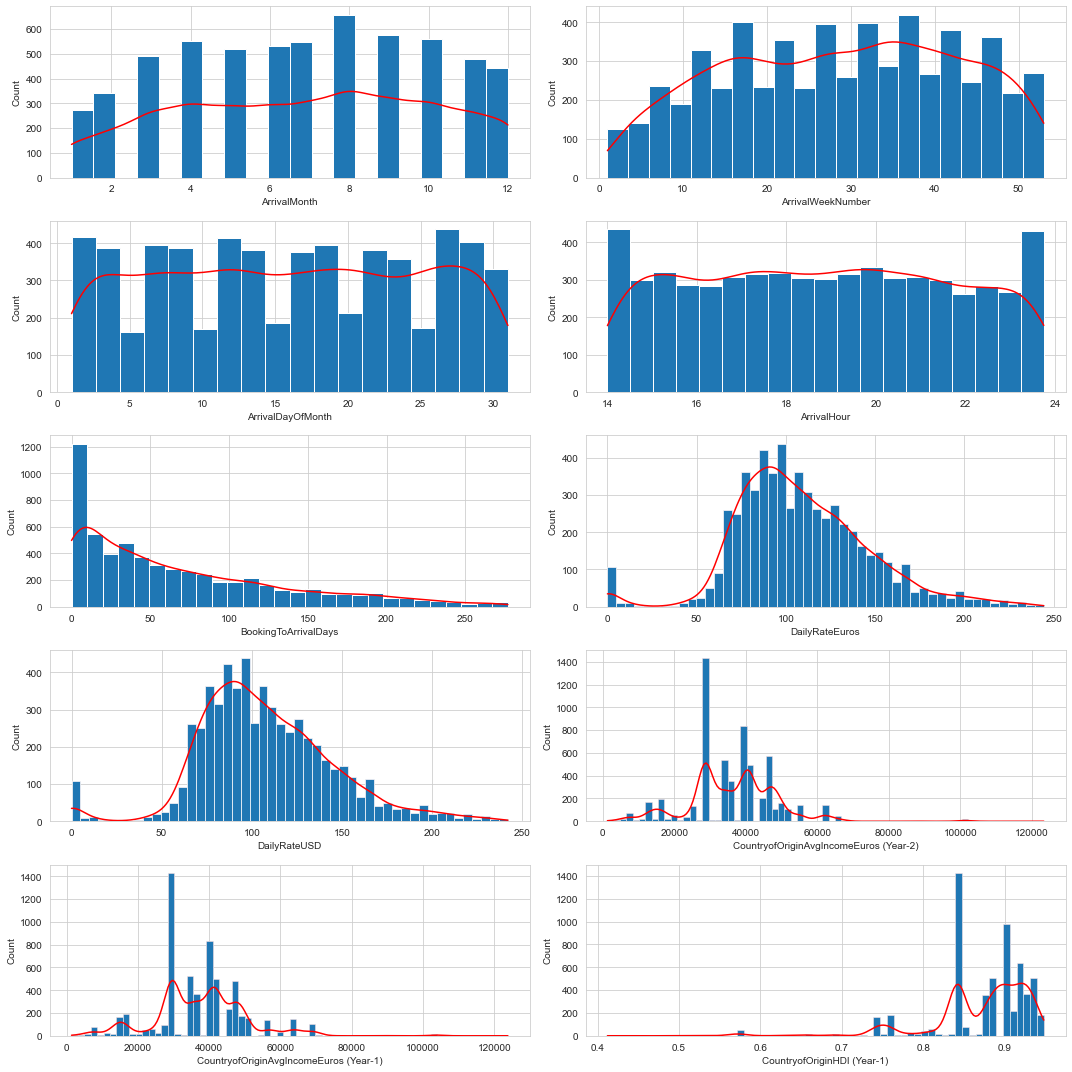

In [61]:
fig, ax = plt.subplots(5,2, figsize=(15,15))

ax_row = 0
ax_col = 0


# for variable in the list, create histogram
for var in hist_test:
    var = str(var)
    sns.histplot(data=test, x=var, kde=True, color='red', alpha=1, ax = ax[ax_col, ax_row])
    sns.histplot(data=test, x=var, kde=False, alpha=1, ax = ax[ax_col, ax_row])
    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 2:
        ax_row = 0
        ax_col += 1

fig.tight_layout()
fig.show()

**Boxplots**

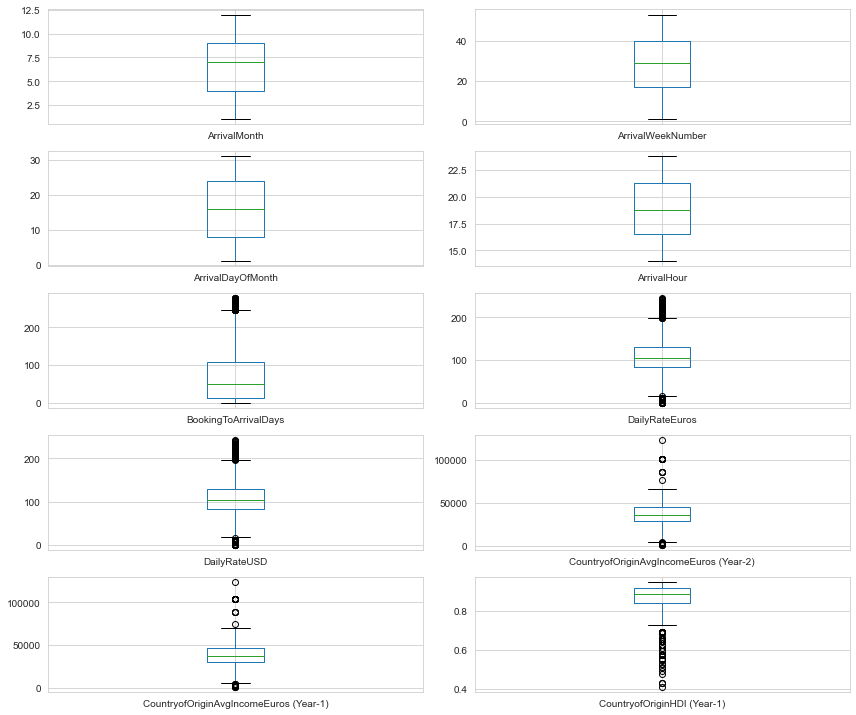

In [62]:
nrows, ncols = 5,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
fig.subplots_adjust(wspace=0.35, hspace=0.25)

for i, f in enumerate(hist_test):
    test.boxplot(f, ax=axes.flatten()[i])

plt.tight_layout()

**Bar Charts**

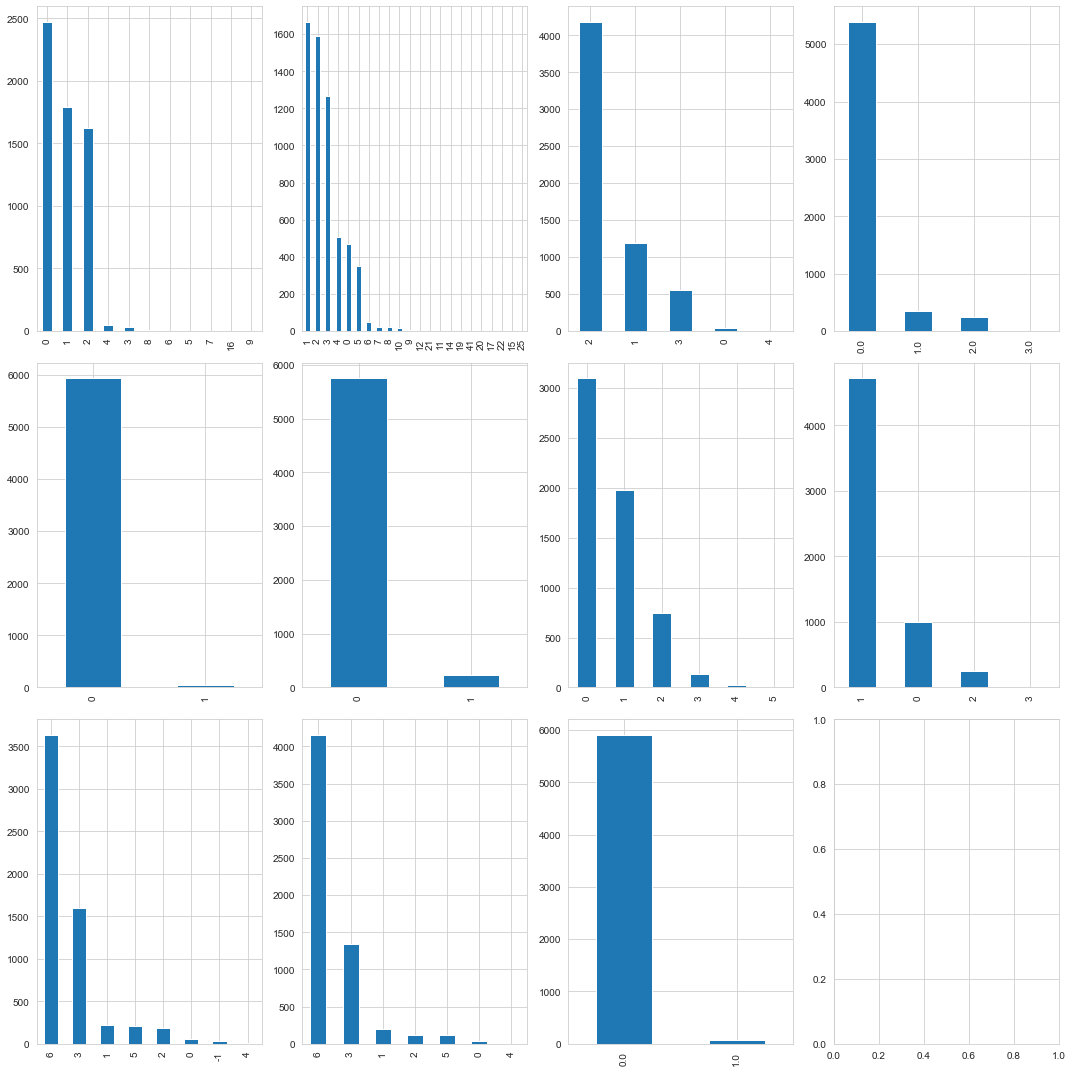

In [63]:
# bar chart
bar_var = ['WeekendStays','WeekdayStays','Adults','Children','Babies','ParkingSpacesBooked','SpecialRequests','OrderedMealsPerDay','FloorAssigned','FloorReserved','%PaidinAdvance']

fig, ax = plt.subplots(3,4, figsize=(15,15))

ax_row = 0
ax_col = 0

for var in bar_var:
    test[var].value_counts().plot(kind='bar', ax = ax[ax_col, ax_row])
    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 4:
        ax_row = 0
        ax_col += 1

fig.tight_layout()
fig.show()

**Pie Charts**

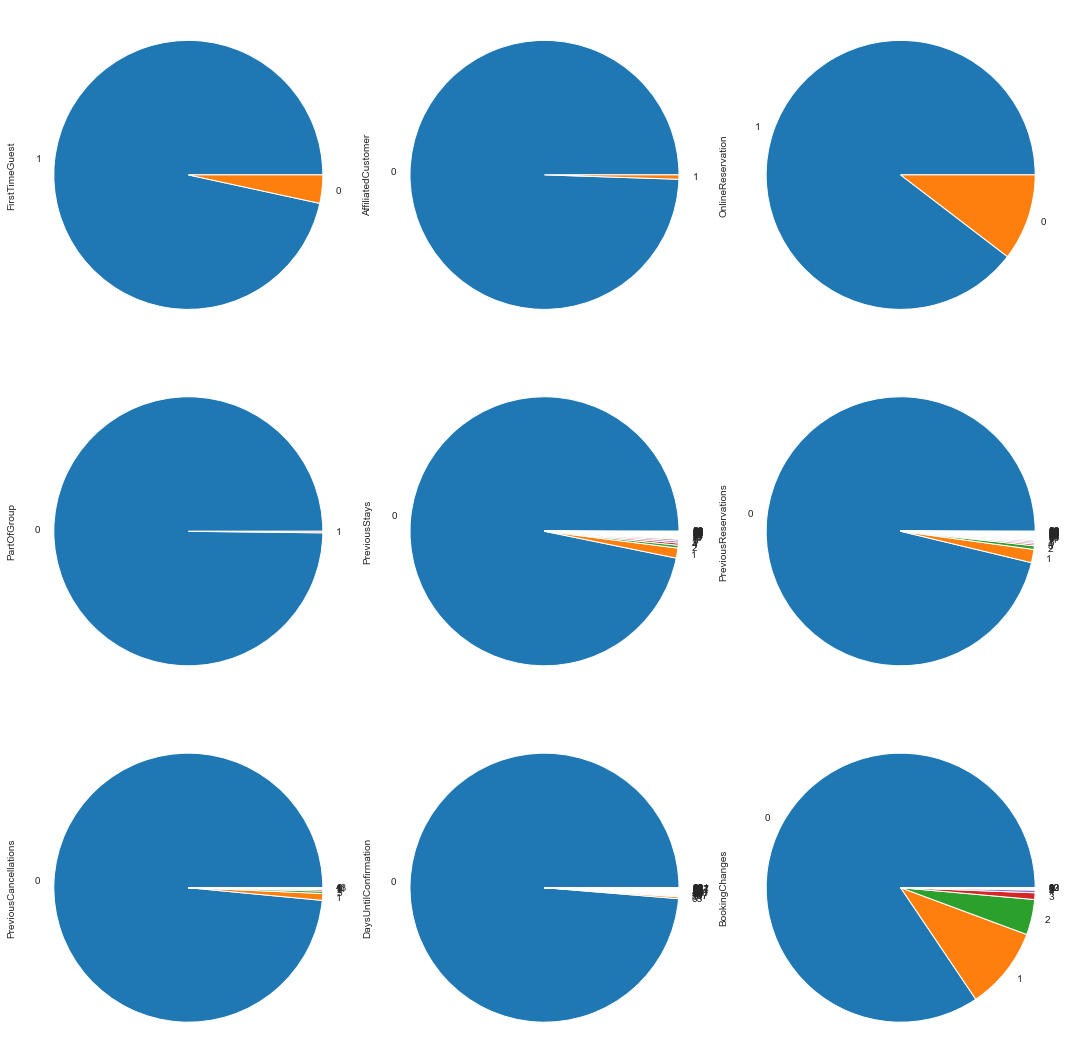

In [64]:
# Create a list with all the BOOLEAN features
bi_variables = ['FirstTimeGuest','AffiliatedCustomer','OnlineReservation','PartOfGroup','PreviousStays','PreviousReservations','PreviousCancellations','DaysUntilConfirmation','BookingChanges']


# Initialise a 3 by 3 plot
fig, ax = plt.subplots(3,3, figsize=(15,15))

# Store index of row and column for loop
ax_row = 0
ax_col = 0

for var in bi_variables:
    test[var].value_counts().plot(kind='pie', ax = ax[ax_col, ax_row])

    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 3:
        ax_row = 0
        ax_col += 1

fig.tight_layout()
fig.show()

#### 1.3. Data Inconsistencies

**First time guest which have previous stays**<br>
There are 21 guests (`BookingID`) which verify this condition.

In [65]:
test.loc[(test['FirstTimeGuest'] == 1) & (test['PreviousStays'] > 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,,,,,,,,,,,,
10943,11,47,13,18.00,1,0,2,0.0,0,1,...,0,1,3,3,114.00,112.8600,0.0,40141.59,40833.24,0.898
22047,10,44,24,14.00,1,0,2,0.0,0,1,...,0,1,6,3,0.00,0.0000,0.0,28742.44,29668.86,0.842
38327,11,48,26,21.00,4,7,0,0.0,0,1,...,1,0,6,-1,6.40,6.3360,0.0,55032.96,56803.47,0.920
20787,7,29,11,21.25,1,2,1,0.0,0,1,...,0,1,2,2,106.00,104.9400,0.0,28742.44,29668.86,0.842
28266,8,34,18,17.00,0,1,1,0.0,0,1,...,0,1,6,6,67.00,66.3300,0.0,28742.44,29668.86,0.842
15468,5,21,15,16.25,1,0,2,0.0,0,1,...,0,1,6,2,135.90,134.5410,0.0,13446.40,14455.00,0.743
37517,4,16,10,15.50,2,0,2,0.0,0,1,...,0,1,6,6,12.00,11.8800,0.0,28742.44,29668.86,0.842
19920,6,24,5,14.00,1,0,1,0.0,0,1,...,0,1,6,6,57.50,56.9250,0.0,34212.94,35436.81,0.901
35091,6,24,5,14.25,1,0,1,0.0,0,1,...,0,1,6,6,0.00,0.0000,0.0,34212.94,35436.81,0.901


In [66]:
# First time guests with previous stays are disregarded and changed to not first time guests
test.loc[(test['FirstTimeGuest'] == 1) & (test['PreviousReservations'] > 0), 'FirstTimeGuest'] = 0

---

**Guests without previous reservations but have never been in the hotel (are indeed first time guests)**<br>
There are 26 guests (`BookingID`) which verify this condition.

In [67]:
test.loc[(test['FirstTimeGuest'] == 0) & (test['PreviousReservations'] == 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,,,,,,,,,,,,
22198,8,36,31,17.00,0,0,2,1.0,0,0,...,0,1,6,4,0.00,0.0000,0.0,28742.44,29668.86,0.842
28818,10,44,26,20.50,0,0,1,0.0,0,0,...,0,0,6,-1,0.00,0.0000,0.0,28742.44,29668.86,0.842
15456,4,16,14,21.25,0,0,2,0.0,0,0,...,0,1,6,6,0.00,0.0000,0.0,28742.44,29668.86,0.842
15072,12,51,12,16.75,1,0,2,0.0,0,0,...,0,1,6,6,88.00,87.1200,0.0,33525.74,34912.48,0.885
22717,11,48,24,21.50,0,0,0,0.0,0,0,...,0,1,6,6,0.00,0.0000,0.0,28742.44,29668.86,0.842
26981,11,45,2,17.75,0,0,1,0.0,0,0,...,0,1,6,6,0.00,0.0000,0.0,28742.44,29668.86,0.842
33125,7,31,26,18.00,0,0,0,0.0,0,0,...,0,0,6,5,0.00,0.0000,0.0,28742.44,29668.86,0.842
27605,5,19,3,15.25,0,0,1,0.0,0,0,...,0,1,6,-1,0.00,0.0000,0.0,25751.51,24061.10,0.813
31849,3,10,2,18.00,0,1,1,0.0,0,0,...,0,0,6,6,84.00,83.1600,0.0,28742.44,29668.86,0.842


In [68]:
# customers who were being considered as not first time guests, but had no previous reservations were transformed into first time guests
test.loc[(test['FirstTimeGuest'] == 0) & (test['PreviousReservations'] == 0), 'FirstTimeGuest'] = 1

**Customers who neither stayed at the hotel during weekdays nor weekends**<br>
There are 36 customers (`BookingID`) which verify this condition.

However, all of them are First Time Customers.

In [69]:
test.loc[(test['WeekendStays'] == 0) & (test['WeekdayStays'] == 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,,,,,,,,,,,,
22198,8,36,31,17.00,0,0,2,1.0,0,1,...,0,1,6,4,0.0,0.0,0.0,28742.44,29668.86,0.842
28818,10,44,26,20.50,0,0,1,0.0,0,1,...,0,0,6,-1,0.0,0.0,0.0,28742.44,29668.86,0.842
15456,4,16,14,21.25,0,0,2,0.0,0,1,...,0,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842
18787,12,50,8,20.75,0,0,2,0.0,0,1,...,0,1,3,3,0.0,0.0,0.0,28742.44,29668.86,0.842
27009,9,37,5,19.25,0,0,2,0.0,0,1,...,0,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842
22410,1,2,8,21.50,0,0,2,0.0,0,1,...,0,0,6,6,0.0,0.0,0.0,36194.87,36909.33,0.876
22717,11,48,24,21.50,0,0,0,0.0,0,1,...,0,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842
26981,11,45,2,17.75,0,0,1,0.0,0,1,...,0,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842
33125,7,31,26,18.00,0,0,0,0.0,0,1,...,0,0,6,5,0.0,0.0,0.0,28742.44,29668.86,0.842


In [70]:
test.loc[(test['PreviousReservations'] >0) & (test['PreviousStays'] ==0) & (test['PreviousCancellations'] ==0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,PartOfGroup,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,,,,,,,,,,,,


---------

### 2. Train dataset

#### 2.1. Preprocessing

The next cell creates a copy of the training dataset, in order to prevent any mistakes that can permanently change the original dataset.

In [71]:
train = train_orig.copy()

We will now do the same as we did for the test set and drop the uni-variate features.

In [72]:
train.drop(['ArrivalYear', 'CompanyReservation'], axis=1, inplace=True)

#### 2.2. Data Exploration

As a way to understand how the training dataset is composed and what type of variables it contains, the following cells were computed.

In [73]:
train

,BookingID,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
0,10423,3,13,21,18.00,1,2,2,0.0,0,...,1,6,3,85.00,84.1500,0.0,40141.59,40833.24,0.898,0
1,14038,4,17,23,16.00,2,4,2,2.0,0,...,1,1,1,206.00,203.9400,0.0,7199.25,7096.60,0.572,1
2,37179,12,53,28,16.00,0,1,2,0.0,0,...,1,6,6,138.00,136.6200,0.0,28742.44,29668.86,0.842,1
3,15019,4,18,30,15.25,2,5,2,0.0,0,...,1,6,6,109.81,108.7119,0.0,28742.44,29668.86,0.842,0
4,30385,5,21,17,15.50,0,2,2,0.0,0,...,1,6,5,140.00,138.6000,0.0,28742.44,29668.86,0.842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,23233,2,6,4,21.25,0,2,1,0.0,0,...,1,6,6,62.10,61.4790,0.0,28742.44,29668.86,0.842,1
13934,32833,7,28,8,16.75,0,1,2,2.0,0,...,1,1,1,168.30,166.6170,0.0,36194.87,36909.33,0.876,1
13935,30966,2,6,6,16.00,2,6,2,0.0,0,...,0,6,6,62.58,61.9542,0.0,49233.22,50302.07,0.926,0
13936,10462,6,24,8,16.00,0,4,3,0.0,0,...,1,3,3,150.30,148.7970,0.0,34212.94,35436.81,0.901,1


The training dataset is composed of 34 variables and 13 938 observations.

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13938 entries, 0 to 13937
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BookingID                               13938 non-null  int64  
 1   ArrivalMonth                            13938 non-null  int64  
 2   ArrivalWeekNumber                       13938 non-null  int64  
 3   ArrivalDayOfMonth                       13938 non-null  int64  
 4   ArrivalHour                             13938 non-null  float64
 5   WeekendStays                            13938 non-null  int64  
 6   WeekdayStays                            13938 non-null  int64  
 7   Adults                                  13938 non-null  int64  
 8   Children                                13938 non-null  float64
 9   Babies                                  13938 non-null  int64  
 10  FirstTimeGuest                          13938 non-null  in

It can be verified from the above output that there are no missing values in the training dataset.

In [75]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
BookingID,13938.0,25020.128569,8662.718479,10000.000,17516.250000,25009.000,32543.750,39997.000
ArrivalMonth,13938.0,6.854498,3.175421,1.000,4.000000,7.000,10.000,12.000
ArrivalWeekNumber,13938.0,28.851413,13.901656,1.000,17.000000,29.000,41.000,53.000
ArrivalDayOfMonth,13938.0,15.888148,8.850454,1.000,8.000000,16.000,24.000,31.000
ArrivalHour,13938.0,18.874121,2.884563,14.000,16.250000,19.000,21.250,23.750
WeekendStays,13938.0,0.882695,0.945422,0.000,0.000000,1.000,2.000,14.000
WeekdayStays,13938.0,2.292510,1.735639,0.000,1.000000,2.000,3.000,35.000
Adults,13938.0,1.885852,0.547217,0.000,2.000000,2.000,2.000,4.000
Children,13938.0,0.141627,0.452717,0.000,0.000000,0.000,0.000,3.000
Babies,13938.0,0.006959,0.116244,0.000,0.000000,0.000,0.000,10.000


In [76]:
train.nunique().sort_values()

Canceled                                      2
PartOfGroup                                   2
ParkingSpacesBooked                           2
OnlineReservation                             2
FirstTimeGuest                                2
AffiliatedCustomer                            2
%PaidinAdvance                                3
Children                                      4
Babies                                        4
OrderedMealsPerDay                            4
Adults                                        5
SpecialRequests                               6
FloorReserved                                 7
FloorAssigned                                 8
PreviousCancellations                         9
WeekendStays                                 11
ArrivalMonth                                 12
BookingChanges                               14
WeekdayStays                                 25
ArrivalDayOfMonth                            31
ArrivalHour                             

Through checking the number of different values the columns of the training dataset have, it is possible to conclude that:
- Arrival Year and Company Reservation are constant variables (Therefore, they shall be excluded from any model to be applied);
- There are as many rows as there are BookingID values, which can mean that there are no duplicated values in this dataset;

In [77]:
train[train.duplicated() == True]

,BookingID,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled


There are no duplicate rows in the training dataset.

In [78]:
train[train['BookingID'].duplicated()]

,BookingID,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled


There are no duplicate BookingID in the dataset (all reservations were made by different customers - customer signature table).

Note that as `BookingID` is, as one may say, the 'Entry' which is the identifier of each user/customer of the hotel. Therefore, it can be defined as an ID column using the `set_index()` method (as it can be observed in the next cell).

In [79]:
train.set_index(['BookingID'], inplace = True)
# calls the head of the dataset (just to verify the set_index() was performed correctly)
train.head(3)

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
10423,3,13,21,18.0,1,2,2,0.0,0,1,...,1,6,3,85.0,84.15,0.0,40141.59,40833.24,0.898,0
14038,4,17,23,16.0,2,4,2,2.0,0,1,...,1,1,1,206.0,203.94,0.0,7199.25,7096.60,0.572,1
37179,12,53,28,16.0,0,1,2,0.0,0,1,...,1,6,6,138.0,136.62,0.0,28742.44,29668.86,0.842,1


#### 2.3 Data Visualization

**Histograms**

In [80]:
hist_train = train.drop(['Canceled','WeekendStays', 'WeekdayStays', 'Adults', 'Children', 'Babies', 'ParkingSpacesBooked',
     'SpecialRequests', 'OrderedMealsPerDay', 'FloorAssigned', 'FloorReserved', '%PaidinAdvance', 'FirstTimeGuest',
     'AffiliatedCustomer', 'OnlineReservation', 'PartOfGroup', 'PreviousStays',
     'PreviousReservations', 'PreviousCancellations', 'DaysUntilConfirmation', 'BookingChanges'], axis=1)

In [81]:
hist_train

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,BookingToArrivalDays,DailyRateEuros,DailyRateUSD,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1)
BookingID,,,,,,,,,,
10423,3,13,21,18.00,45,85.00,84.1500,40141.59,40833.24,0.898
14038,4,17,23,16.00,2,206.00,203.9400,7199.25,7096.60,0.572
37179,12,53,28,16.00,14,138.00,136.6200,28742.44,29668.86,0.842
15019,4,18,30,15.25,98,109.81,108.7119,28742.44,29668.86,0.842
30385,5,21,17,15.50,64,140.00,138.6000,28742.44,29668.86,0.842
...,...,...,...,...,...,...,...,...,...,...
23233,2,6,4,21.25,76,62.10,61.4790,28742.44,29668.86,0.842
32833,7,28,8,16.75,173,168.30,166.6170,36194.87,36909.33,0.876
30966,2,6,6,16.00,9,62.58,61.9542,49233.22,50302.07,0.926


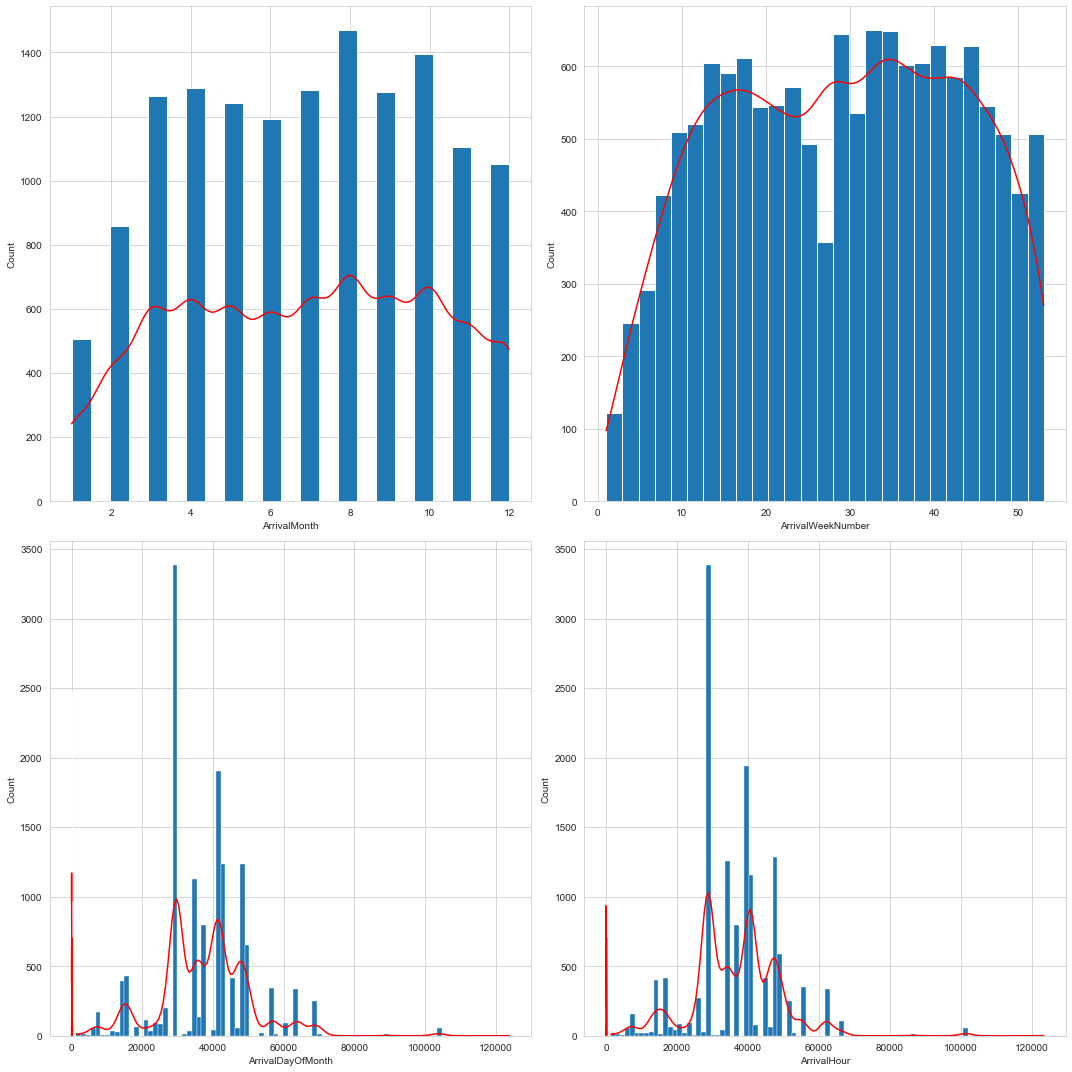

In [82]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

ax_row = 0
ax_col = 0

# for variable in the list, create histogram
for var in hist_train:
    var = str(var)
    sns.histplot(data=hist_train, x=var, kde=True, color='red', alpha=1, ax = ax[ax_col, ax_row])
    sns.histplot(data=hist_train, x=var, kde=False, alpha=1, ax = ax[ax_col, ax_row])
    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 2:
        ax_row = 0
        ax_col = 1

fig.tight_layout()
fig.show()

**Boxplots**

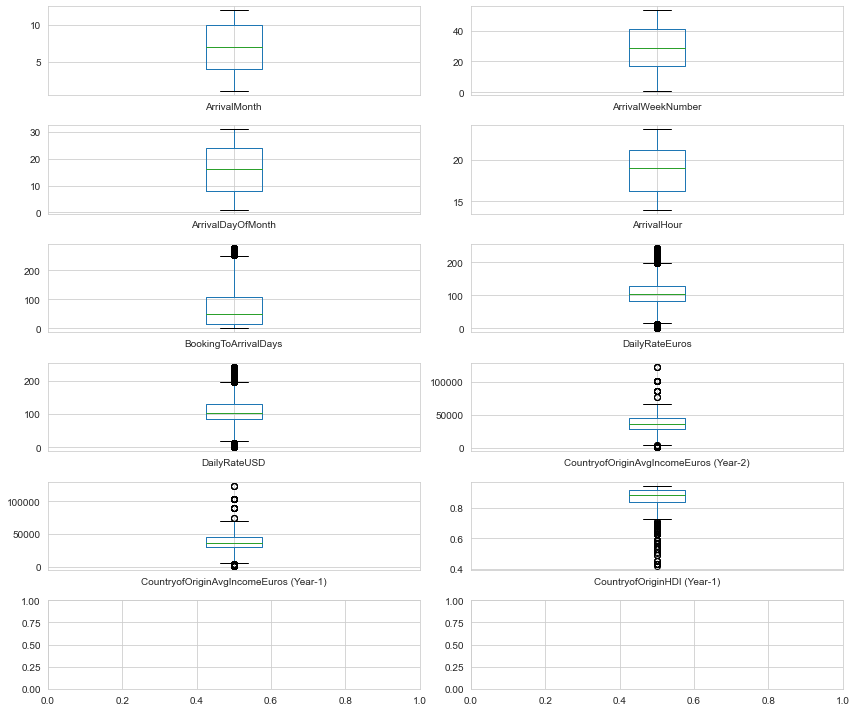

In [83]:
# creates list with all continuous variables which seemed to have a normal distribution in the histograms
# creates box-plots in the defined number of rows and columns
nrows, ncols = 6,2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
fig.subplots_adjust(wspace=0.35, hspace=0.25)

for i, f in enumerate(hist_train):
    train.boxplot(f, ax=axes.flatten()[i])

plt.tight_layout()

**Bar Charts**

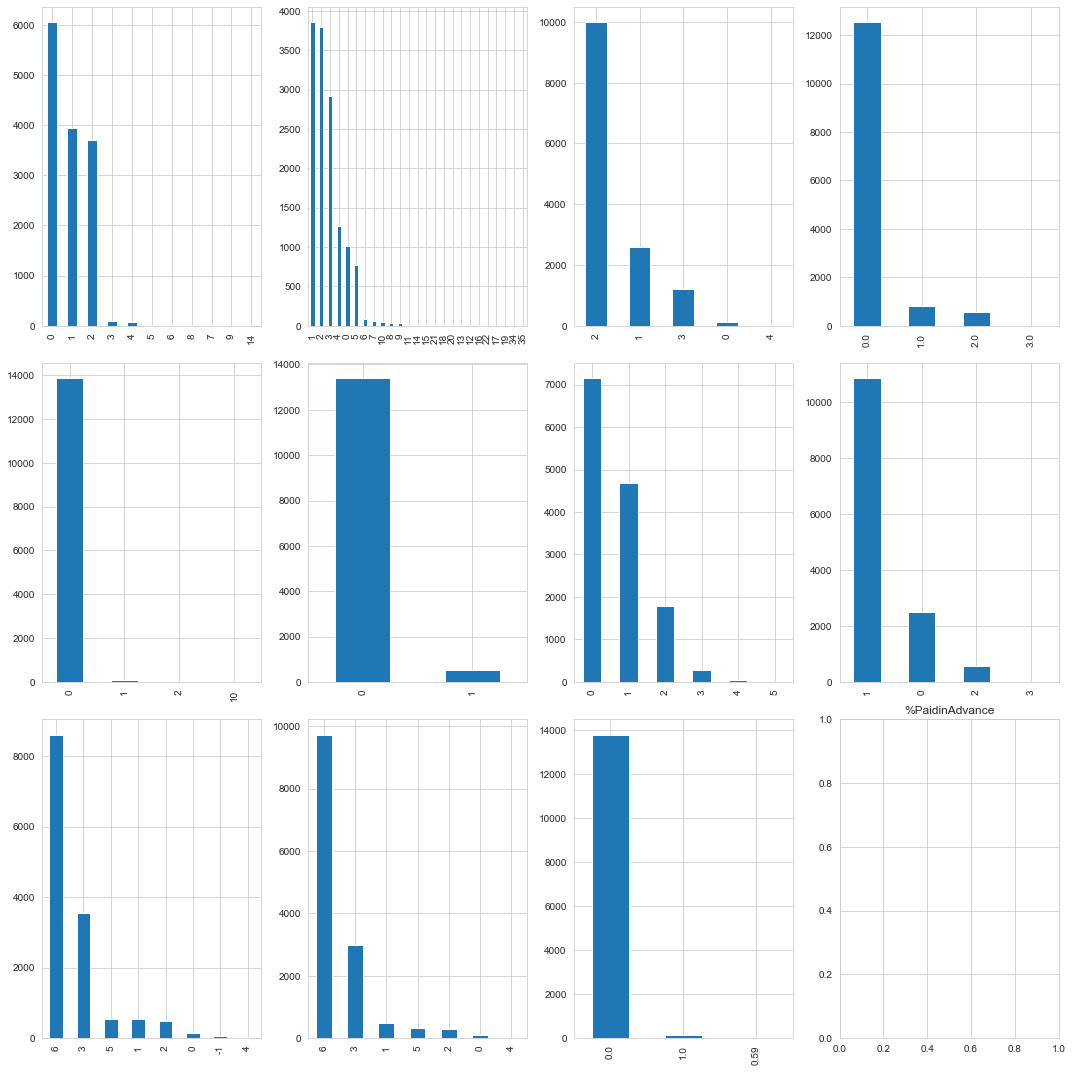

In [84]:
# bar chart
bar_var = ['WeekendStays','WeekdayStays','Adults','Children','Babies','ParkingSpacesBooked','SpecialRequests','OrderedMealsPerDay','FloorAssigned','FloorReserved','%PaidinAdvance']

fig, ax = plt.subplots(3,4, figsize=(15,15))

ax_row = 0
ax_col = 0

for var in bar_var:
    plt.title(var)
    #plt.bar(train[var].value_counts().index, train[var].value_counts().values)
    train[var].value_counts().plot(kind='bar', ax = ax[ax_col, ax_row])
    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 4:
        ax_row = 0
        ax_col += 1

fig.tight_layout()
fig.show()



**Pie Charts**

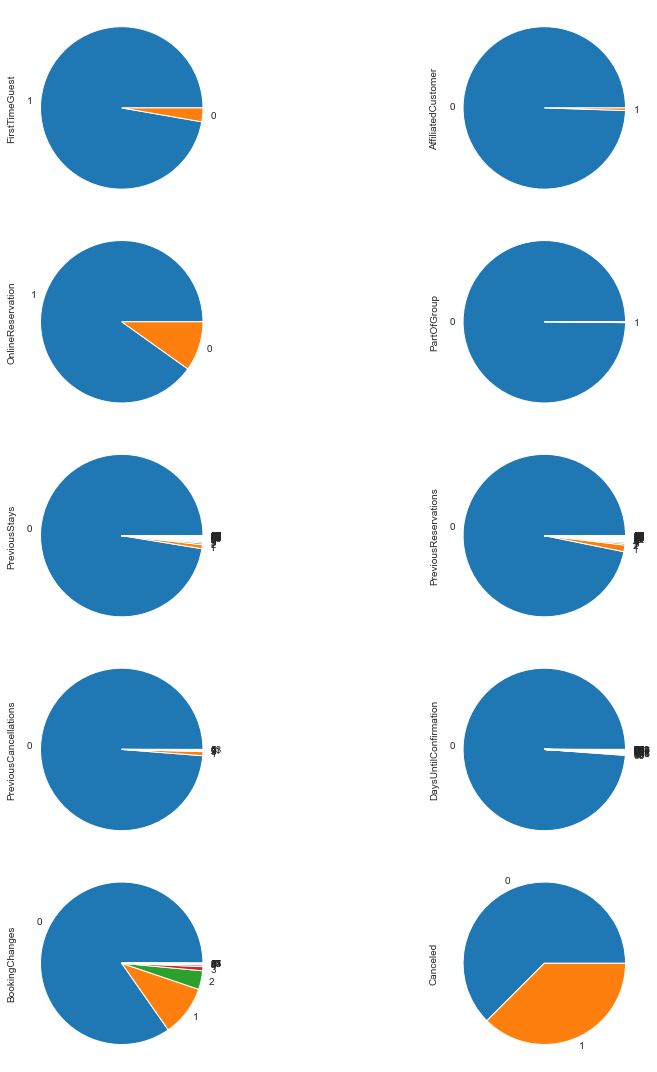

In [85]:
# Create a list with all the continuous features
bi_variables = ['FirstTimeGuest','AffiliatedCustomer','OnlineReservation','PartOfGroup','PreviousStays','PreviousReservations','PreviousCancellations','DaysUntilConfirmation','BookingChanges','Canceled']


# Initialise a 3 by 3 plot
fig, ax = plt.subplots(5,2, figsize=(15,15))

# Store index of row and column for loop
ax_row = 0
ax_col = 0

for var in bi_variables:
    train[var].value_counts().plot(kind='pie', ax = ax[ax_col, ax_row])

    ax_row += 1
    # Restart row when it reaches 3 and add a column
    if ax_row == 2:
        ax_row = 0
        ax_col += 1

fig.tight_layout()
fig.show()

#### 2.4 Data Inconsistencies (Training Dataset)

**1st time guest which have previous stays**
There are 36 guests (`BookingID`) which verify this condition.

In [86]:
train.loc[(train['FirstTimeGuest'] == 1) & (train['PreviousStays'] > 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
15286,5,22,23,22.25,1,1,1,0.0,0,1,...,1,2,2,106.00,104.9400,1.0,28742.44,29668.86,0.842,0
34894,4,15,9,21.75,1,1,2,0.0,0,1,...,1,6,6,70.00,69.3000,0.0,28742.44,29668.86,0.842,1
39378,10,44,28,23.75,0,1,1,0.0,0,1,...,1,6,6,62.50,61.8750,0.0,47011.55,47683.79,0.933,0
35705,8,36,28,19.00,1,0,2,0.0,0,1,...,1,2,2,159.30,157.7070,0.0,13446.40,14455.00,0.743,0
16170,3,11,7,17.25,1,3,1,0.0,0,1,...,2,6,6,88.00,87.1200,0.0,14326.28,14711.22,0.749,0
39296,1,2,7,18.00,0,1,1,0.0,0,1,...,1,6,3,45.00,44.5500,0.0,28742.44,29668.86,0.842,0
22319,7,28,4,15.50,1,0,1,0.0,0,1,...,1,2,2,106.00,104.9400,0.0,28742.44,29668.86,0.842,0
12710,4,16,13,16.00,0,1,2,0.0,0,1,...,2,6,6,90.00,89.1000,0.0,28742.44,29668.86,0.842,0
10501,10,42,13,21.25,0,1,1,0.0,0,1,...,0,6,6,102.60,101.5740,0.0,55032.96,56803.47,0.920,0


In [87]:
# First time guests with previous stays are disregarded and changed to not first time guests
train.loc[(train['FirstTimeGuest'] == 1) & (train['PreviousReservations'] > 0), 'FirstTimeGuest'] = 0

**Guests without previous reservations but have never been in the hotel (are indeed first time guests)**
There are 57 guests (`BookingID`) which verify this condition.

In [88]:
train.loc[(train['FirstTimeGuest'] == 0) & (train['PreviousReservations'] == 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
23621,12,52,20,22.25,0,0,0,0.0,0,0,...,1,6,3,0.0,0.00,0.0,28742.44,29668.86,0.842,0
37585,1,1,2,17.50,2,1,2,0.0,0,0,...,2,6,6,109.0,107.91,0.0,36194.87,36909.33,0.876,0
15254,7,30,17,23.50,0,0,2,0.0,0,0,...,1,6,6,0.0,0.00,0.0,28742.44,29668.86,0.842,0
23052,6,26,21,19.25,0,0,0,0.0,0,0,...,1,3,4,0.0,0.00,0.0,28742.44,29668.86,0.842,0
35912,10,44,28,23.00,0,0,2,0.0,0,0,...,0,6,6,0.0,0.00,0.0,28742.44,29668.86,0.842,0
17616,10,44,29,17.50,1,1,2,0.0,0,0,...,1,6,6,12.0,11.88,0.0,33525.74,34912.48,0.885,0
18478,7,28,6,23.50,0,0,3,0.0,0,0,...,1,6,4,0.0,0.00,0.0,28742.44,29668.86,0.842,0
29647,5,21,20,22.75,0,0,1,0.0,0,0,...,1,6,3,0.0,0.00,0.0,55032.96,56803.47,0.920,0
20524,11,48,23,23.75,0,0,0,0.0,0,0,...,1,6,6,0.0,0.00,0.0,28742.44,29668.86,0.842,0


In [89]:
# customers who were being considered as not first time guests, but had no previous reservations were transformed into first time guests
train.loc[(train['FirstTimeGuest'] == 0) & (train['PreviousReservations'] == 0), 'FirstTimeGuest'] = 1

**Customers who neither stayed at the hotel during weekdays nor weekends**
There are 71 customers (`BookingID`) which verify this condition.

However, we do not have enough information to treat this kind of inconsistency.

In [90]:
train.loc[(train['WeekendStays'] ==0) & (train['WeekdayStays'] == 0)]

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
23621,12,52,20,22.25,0,0,0,0.0,0,1,...,1,6,3,0.0,0.0,0.0,28742.44,29668.86,0.842,0
30744,4,17,21,23.75,0,0,2,0.0,0,1,...,1,5,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
22210,1,4,22,18.25,0,0,1,0.0,0,1,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
15254,7,30,17,23.50,0,0,2,0.0,0,1,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
13369,2,9,26,20.00,0,0,1,0.0,0,1,...,0,6,6,0.0,0.0,0.0,36194.87,36909.33,0.876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22761,10,42,14,23.75,0,0,1,0.0,0,1,...,1,6,-1,0.0,0.0,0.0,28742.44,29668.86,0.842,0
36730,3,13,23,18.25,0,0,2,0.0,0,1,...,1,6,5,0.0,0.0,0.0,20008.32,20551.83,0.822,1
24432,8,34,20,21.75,0,0,2,0.0,0,1,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0


**Affiliated Customers who have never stayed in the hotel before**
There are 49 customers who verify this condition. However, this cannot be considered as an inconsistency because it can indeed happen (example, hired influencer to promote the hotel).

In [91]:
train.loc[(train['AffiliatedCustomer'] == 1) & (train['FirstTimeGuest'] == 1)]
# not inconsistency

,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
39196,4,17,17,16.50,2,2,2,0.0,0,1,...,1,6,6,107.00,105.9300,0.0,28742.44,29668.86,0.842,1
13059,7,30,20,22.25,0,3,3,0.0,0,1,...,1,6,6,96.73,95.7627,0.0,28742.44,29668.86,0.842,1
27321,2,7,13,15.25,0,1,2,0.0,0,1,...,1,6,6,87.00,86.1300,0.0,28742.44,29668.86,0.842,1
13870,5,19,4,18.50,0,4,2,0.0,0,1,...,1,6,6,106.20,105.1380,0.0,28742.44,29668.86,0.842,1
22334,1,2,9,16.25,2,1,1,0.0,0,1,...,2,6,6,73.60,72.8640,0.0,41259.00,42509.89,0.918,0
25012,3,13,25,19.25,1,2,2,2.0,0,1,...,1,6,1,67.50,66.8250,0.0,36194.87,36909.33,0.876,0
10439,8,32,6,20.50,1,1,2,0.0,0,1,...,1,5,5,105.25,104.1975,0.0,40141.59,40833.24,0.898,0
36078,5,19,5,23.25,0,3,2,0.0,0,1,...,1,3,3,127.00,125.7300,0.0,47011.55,47683.79,0.933,0
36518,6,27,28,23.00,0,5,2,0.0,0,1,...,0,6,6,80.75,79.9425,0.0,40141.59,40833.24,0.898,0


---

#### 2.5 Training Dataset Division

The training dataset was now divided into predictors (X) and outcome variable (Y).
For this, `train_test_split` was used, considering 20% of the datasets observations as validation data and making sure the proportions of the new training and validation datasets are similar (`stratify = y`)

In [92]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2,random_state = 42, stratify = y, shuffle = True)

---

### 3. Feature Selection

The next step of the project is to perform feature selection, in order to choose the best combination of the dataset's features for our model.

In [94]:
X_train_n = X_train.select_dtypes(include = np.number).set_index(X_train.index)

X_val_n = X_val.select_dtypes(include = np.number).set_index(X_val.index)

In [95]:
Xn = X.select_dtypes(include = np.number).set_index(X.index)

test_n = test.select_dtypes(include = np.number).set_index(test.index)

#### 3.1 Data Scaling

Feature selection was performed for the following three types of scalling.
- Standard Scaling
- MinMax Scaling
- Robust Scaling

The one which gave the best results was robust scaling. Therefore, it was the chosen one and the only scaling method presented below.

**3.1.1 ↦ Robust Scaling**

In [96]:
rob_scaler = RobustScaler().fit(X_train_n)

X_train_n_scl_rb = rob_scaler.transform(X_train_n)
X_train_n_scl_rb = pd.DataFrame(X_train_n_scl_rb, columns = X_train_n.columns).set_index(X_train_n.index)

X_val_n_scl_rb = rob_scaler.transform(X_val_n)
X_val_n_scl_rb = pd.DataFrame(X_val_n_scl_rb, columns = X_val_n.columns).set_index(X_val_n.index)

In [97]:
rob_scalerX = RobustScaler().fit(Xn)

X_rb = rob_scalerX.transform(Xn)
X_rb = pd.DataFrame(X_rb, columns = Xn.columns).set_index(Xn.index)

test_rb = rob_scalerX.transform(test_n)
test_rb = pd.DataFrame(test_rb, columns = test_n.columns).set_index(test_n.index)

### 3.2 Feature Selection Methods
### 3.2.1 Filter Methods

**↦ Correlation matrix**

Below there is a function that generates the heatmap with all numerical features.


Through the Spearman Correlation Heatmap it is possible to better visualize the relationship between every single feature of the dataset.
If there is a correlation value, between two variables, which is arguably bigger than 0.8, then those two features are **extremely highly correlated** variables which could imply the nedd to either **eliminate one of them** or **create a new one** that derives from the highly correlated ones.

In this specific case, the only possibly good predictors of the outcome variable (`Canceled`) were features with a correlation value above |0.25|.

In [98]:
#spearman correlation matrix
def cor_heatmap(cor):
    plt.figure(figsize=(20,26))
    mask_ld=np.triu(np.ones_like(cor,dtype=bool))
    sns.heatmap(data = cor, annot = True, cmap = 'vlag', fmt='.2', mask=mask_ld, square =  True)
    plt.savefig('Data/Heatmap.png')
    plt.show()

In [99]:
all_train_n = X_train_n_scl_rb.join(y_train)

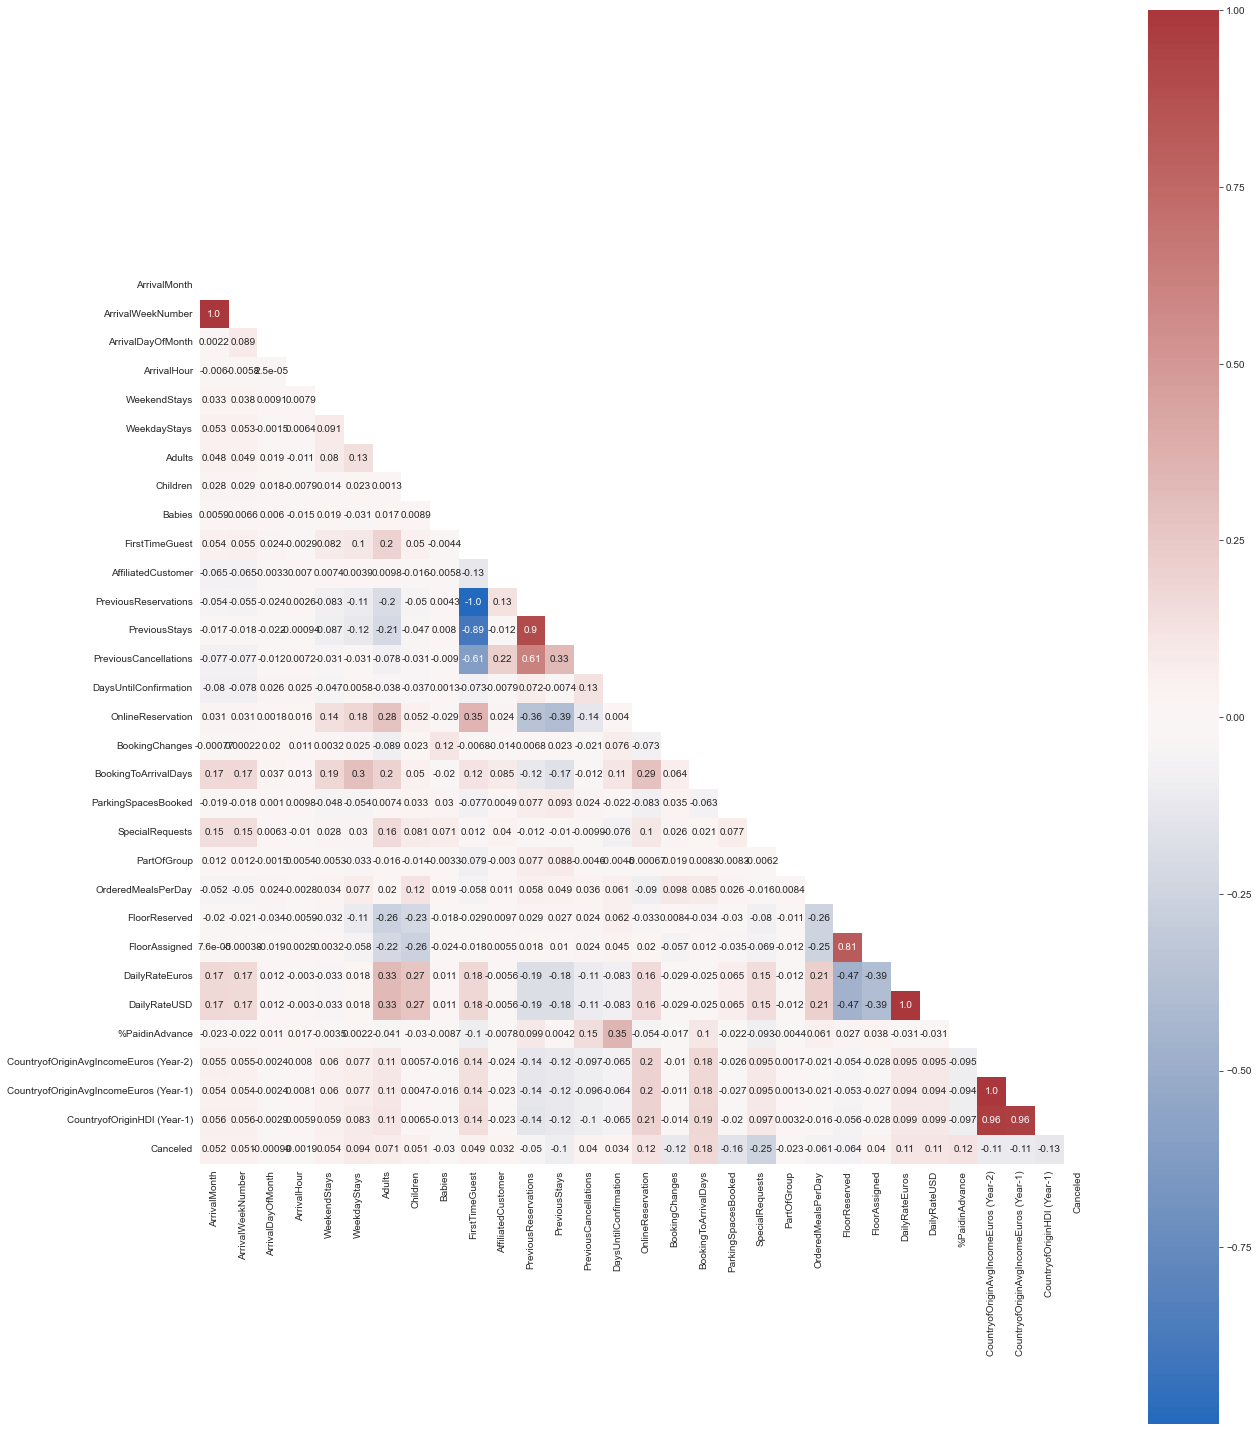

In [100]:
cor_spearman = all_train_n.corr(method = 'spearman')
cor_heatmap(cor_spearman)

From the analyis of the above shown correlation heatmap, the following pairs of variables show a high degree of correlation between each other:
- `FloorAssigned` and `FloorReserved`(0.81)
- `PreviousReservations` and `PreviousStays` (0.90);
- `CountryofOriginHDI (Year-1)` + `CountryofOriginAvgIncomeEuros (Year-1)`  (0.96)
- `CountryofOriginHDI (Year-1)` + `CountryofOriginAvgIncomeEuros (Year-2)`  (0.96)
- `ArrivalWeekNumber` and `ArrivalMonth` (1.0);
- `DailyRateEuros` and `DailyRateUSD` (1.0)
- `CountryofOriginAvgIncomeEuros (Year-2)` and  `CountryofOriginAvgIncomeEuros (Year-1)` (1.0)
- `PreviousReservation`and `FirstTimeGuest`(-1.0)
- `Previous Stays` and `FirstTimeGuest`(-0.89)

Moreover, with these first insights one may conclude that some of these dataset variables must be dropped in the feature selection step of this project.

For the highly correlated features, correlation's absolute value larger than 0.7, it was decided that it would be necessary to drop of one them based on the following two conditions:
1. Value of the Correlation with the target variable (the one which has the higher value is kept);
2. Complexity (the one with less unique values is kept)
3. Interpretability (specifically for `CountryofOriginAvgIncomeEuros (Year-2)`, where we decided to keep its Year 1 counterpart due to the existence of the HDI of that same year. A similar approach was taken with `DailyRateUSD` due to the location of the Hotel).

The ExtraTreesClassifier will be used to see which of the highly correlated features most seem to affect the outcome:

In [101]:
# Initialize the Extra Trees classifier
extree = ExtraTreesClassifier(random_state=42)

# Fit the classifier to the training data
extree.fit(X_train_n_scl_rb, y_train)

# Print the feature importances
#print(extree.feature_importances_)

# Get the feature names
feature_names = X_train_n_scl_rb.columns

# Zip the feature names and importances together
importances = extree.feature_importances_
feature_importances = zip(feature_names, importances)

# Sort the feature importances by the importance
sorted_feature_importances_etc = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the feature names and importances
for feature, importance in sorted_feature_importances_etc:
    print(feature, importance)

BookingToArrivalDays 0.08905214271588047
SpecialRequests 0.08817949921218544
DailyRateUSD 0.07015506858710303
DailyRateEuros 0.07014366277845692
ArrivalHour 0.06241919423089058
ArrivalWeekNumber 0.060440499244578096
ArrivalDayOfMonth 0.05823484442589362
WeekdayStays 0.052732575995201605
CountryofOriginHDI (Year-1) 0.05068806671408779
ArrivalMonth 0.04977002389996763
CountryofOriginAvgIncomeEuros (Year-1) 0.04726813786744731
CountryofOriginAvgIncomeEuros (Year-2) 0.04688137280756649
WeekendStays 0.04083086008189361
FloorAssigned 0.03309342796409826
Adults 0.026867671959482482
OrderedMealsPerDay 0.026298481484558326
BookingChanges 0.02607996897450893
FloorReserved 0.02160921204077601
ParkingSpacesBooked 0.021456931416406446
OnlineReservation 0.015892670385606735
Children 0.013250297271508792
%PaidinAdvance 0.01184406876041094
FirstTimeGuest 0.0031112957684447267
PreviousCancellations 0.002792244176411118
DaysUntilConfirmation 0.0023831988124366496
PreviousReservations 0.00233417907746346

With this in mind, we will drop the following variables, which showed less importance than those who they correlate with.

In [102]:
X_train_n_scl_rb.drop(
    ['ArrivalMonth', 'FirstTimeGuest', 'CountryofOriginAvgIncomeEuros (Year-2)', 'DailyRateUSD', 'PreviousStays',
     'FloorReserved', 'PreviousStays', 'CountryofOriginAvgIncomeEuros (Year-1)'],
    axis=1, inplace=True)
X_val_n_scl_rb.drop(
    ['ArrivalMonth', 'FirstTimeGuest', 'CountryofOriginAvgIncomeEuros (Year-2)', 'DailyRateUSD', 'PreviousStays',
     'FloorReserved', 'PreviousStays', 'CountryofOriginAvgIncomeEuros (Year-1)'],
    axis=1, inplace=True)
X_rb.drop(
    ['ArrivalMonth', 'FirstTimeGuest', 'CountryofOriginAvgIncomeEuros (Year-2)', 'DailyRateUSD', 'PreviousStays',
     'FloorReserved', 'PreviousStays', 'CountryofOriginAvgIncomeEuros (Year-1)'],
    axis=1, inplace=True)
test_rb.drop(
    ['ArrivalMonth', 'FirstTimeGuest', 'CountryofOriginAvgIncomeEuros (Year-2)', 'DailyRateUSD', 'PreviousStays',
     'FloorReserved', 'PreviousStays', 'CountryofOriginAvgIncomeEuros (Year-1)'],
    axis=1, inplace=True)

In [103]:
len(X_train_n_scl_rb.columns)

23

After this initial feature selection process there are only 23 variables in the datasets.

### 3.2.2 Wrapper Methods

**RFE** was the only wrapper method used in this feature selection process of the project.

- Note that the main goal of the following for loop is reaching an optimap solution for the best number of features for the final model. It takes into consideration two main parameters, the model that is going to be used and the type of scaling that was applied to the data.

In [104]:
# Number of features
nof_list=np.arange(1,23)
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()

    rfe = RFE(model,n_features_to_select = nof_list[n])

    X_train_rfe = rfe.fit_transform(X_train_n_scl_rb,y_train)
    X_val_rfe = rfe.transform(X_val_n_scl_rb)

    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if (score > high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 17
Score with 17 features: 0.733859


Now, that there is an answer for the optimum number of features to include in the RFE method, the instance `rfe_lr_rb` will be fitted with the robust scaled X_train numerical data.

In [105]:
rfe_lr_rb = RFE(estimator = LogisticRegression(), n_features_to_select = 17)
X_rfe_lr = rfe_lr_rb.fit_transform(X = X_train_n_scl_rb, y = y_train)

After fitting the training set into the RFE method, the impact of each feature into predicting the outcome feature `Canceled`must be accessed. To do so, the cell below was created.

In [106]:
selected_features_rfe_lr_rb = pd.Series(rfe_lr_rb.support_, index = X_train_n_scl_rb.columns)
selected_features_rfe_lr_rb

ArrivalWeekNumber               True
ArrivalDayOfMonth              False
ArrivalHour                    False
WeekendStays                    True
WeekdayStays                    True
Adults                          True
Children                        True
Babies                         False
AffiliatedCustomer              True
PreviousReservations           False
PreviousCancellations          False
DaysUntilConfirmation          False
OnlineReservation               True
BookingChanges                  True
BookingToArrivalDays            True
ParkingSpacesBooked             True
SpecialRequests                 True
PartOfGroup                     True
OrderedMealsPerDay              True
FloorAssigned                   True
DailyRateEuros                  True
%PaidinAdvance                  True
CountryofOriginHDI (Year-1)     True
dtype: bool

### 3.2.3 Embedded Methods

**Lasso Regression** was the only Embedded method applied to the feature selection process of this project.

In [107]:
reg = LassoCV()

In [108]:
reg.fit(X_train_n_scl_rb, y_train)

LassoCV()

After fitting the above shown Lasso regression with the robust scaled numerical data from the training dataset (`X_train_n_scl_rb`). The resulting coefficients of the lasso regression were computed below.

In [109]:
coef = pd.Series(reg.coef_, index = X_train_n_scl_rb.columns).sort_values()
coef

ParkingSpacesBooked           -0.315563
PartOfGroup                   -0.160943
SpecialRequests               -0.148338
OrderedMealsPerDay            -0.086449
CountryofOriginHDI (Year-1)   -0.081930
BookingChanges                -0.046441
ArrivalDayOfMonth             -0.005959
ArrivalHour                   -0.004672
DaysUntilConfirmation         -0.001079
Babies                         0.000000
PreviousCancellations          0.000827
PreviousReservations           0.001655
WeekendStays                   0.020487
ArrivalWeekNumber              0.031101
WeekdayStays                   0.035296
Adults                         0.041043
Children                       0.058551
FloorAssigned                  0.065284
BookingToArrivalDays           0.083352
DailyRateEuros                 0.095481
OnlineReservation              0.105215
AffiliatedCustomer             0.179625
%PaidinAdvance                 0.413452
dtype: float64

In [110]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")

Lasso picked 22 variables and eliminated the other 1 variables.


After looking carefully at the weights of each feature and using the cell above, we may conclude that 1 of the variables of the dataset had a coefficient got down completely to zero (`Babies`).

In order to, have a clearer idea of these coefficient values and their proportions in relation to each other the graphic shown below was plotted.

In [111]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

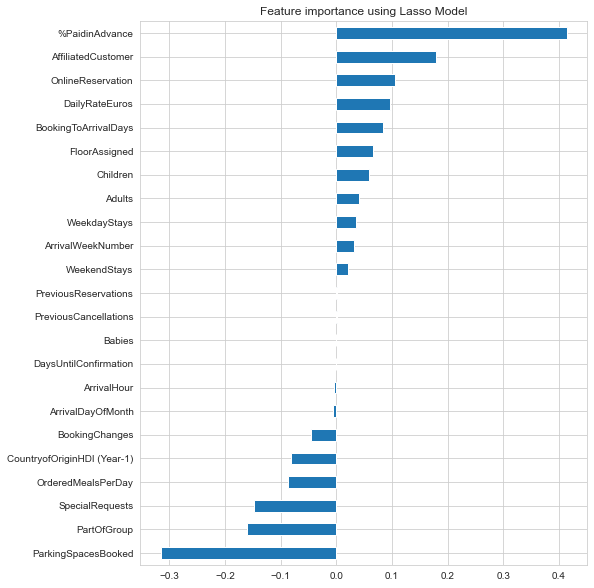

In [112]:
plot_importance(coef,'Lasso')

In [113]:
# Establish a minimum value to be considered for discarding. Babies is automatically discarded.
coef.abs().sort_values() < 0.005

Babies                          True
PreviousCancellations           True
DaysUntilConfirmation           True
PreviousReservations            True
ArrivalHour                     True
ArrivalDayOfMonth              False
WeekendStays                   False
ArrivalWeekNumber              False
WeekdayStays                   False
Adults                         False
BookingChanges                 False
Children                       False
FloorAssigned                  False
CountryofOriginHDI (Year-1)    False
BookingToArrivalDays           False
OrderedMealsPerDay             False
DailyRateEuros                 False
OnlineReservation              False
SpecialRequests                False
PartOfGroup                    False
AffiliatedCustomer             False
ParkingSpacesBooked            False
%PaidinAdvance                 False
dtype: bool

After analysing the importance plot of the coefficients of the lasso regression it is possible to conclude that the feature `Babies` is eliminated by this embedded method. However, the following variables can also be considered to be disregarded from the selected features for the final model:
- `Babies`,
- `PreviousCancellations`,
- `DaysUntilConfirmation`,
- `PreviousReservations`,
- `ArrivalHour`

---

### 3.3 Selected features

<u>**Numerical Features**<u/><br>

After all the above feature selection methods were applied, the final variables considered for the model to be implemented in the next few cells are as follows:
-	ArrivalWeekNumber ,
-	ArrivalDayOfMonth,
-	ArrivalHour,
-	WeekendStays,
-	WeekdayStays,
-	Adults,
-	Children,
-	Babies,
-	AffiliatedCustomer,
-	PreviousReservations,
-	PreviousCancellations,
-	DaysUntilConfirmation,
-	OnlineReservation,
-	BookingChanges,
-	BookingToArrivalDays,
-	ParkingSpacesBooked,
-	SpecialRequests,
-	PartOfGroup,
-	OrderedMealsPerDay,
-	FloorAssigned,
-	DailyRateEuros,
-	%PaidinAdvance,
-	CountryofOriginHDI (Year-1)

After testing these features in model, and having tested new feature selection methods, as will be seen later on, they were found out not to be the best selection that could be used.

---

In the next cells, with the intent of improving the feature selection, some new methods will be used.

**↦ SelectKBest** (and mutual information)

In [115]:
# Create a cross-validation object
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute mutual information
mi = mutual_info_classif(X_train_n_scl_rb, y_train)

# Define a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Select the top k features based on mutual information
for k in range(12, 23):
    selector = SelectKBest(k=k)
    X_train_selected = selector.fit_transform(X_train_n_scl_rb, y_train)


    # Compute the cross-validated performance of the classifier on the selected features
    scores = cross_val_score(clf, X_train_selected, y_train, cv=cv, scoring='accuracy')

    # Get the indices of the selected features
    selected_feature_indices = selector.get_support()

    # Print the names of the selected features
    print(f"Selected features: {[list(X_train_n_scl_rb.columns)[i] for i in range(len(X_train_n_scl_rb.columns)) if selected_feature_indices[i]]}")

    # Print the mean and standard deviation of the scores
    print(f"Mean score: {scores.mean():.3f}")
    print(f"Standard deviation: {scores.std():.3f}")


Selected features: ['WeekendStays', 'WeekdayStays', 'Adults', 'OnlineReservation', 'BookingChanges', 'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'OrderedMealsPerDay', 'DailyRateEuros', '%PaidinAdvance', 'CountryofOriginHDI (Year-1)']
Mean score: 0.762
Standard deviation: 0.013
Selected features: ['WeekendStays', 'WeekdayStays', 'Adults', 'Children', 'OnlineReservation', 'BookingChanges', 'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'OrderedMealsPerDay', 'DailyRateEuros', '%PaidinAdvance', 'CountryofOriginHDI (Year-1)']
Mean score: 0.763
Standard deviation: 0.016
Selected features: ['ArrivalWeekNumber', 'WeekendStays', 'WeekdayStays', 'Adults', 'Children', 'OnlineReservation', 'BookingChanges', 'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'OrderedMealsPerDay', 'DailyRateEuros', '%PaidinAdvance', 'CountryofOriginHDI (Year-1)']
Mean score: 0.772
Standard deviation: 0.013
Selected features: ['ArrivalWeekNumber', 'WeekendStays'

**↦ KBest, RFE, RFECV and SelectFromModel**

In [116]:
# Create a cross-validation object
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a classifier
clf = RandomForestClassifier(n_estimators=100,random_state=42)

# Select the top k features based on mutual information
k = 16
selector_kbest = SelectKBest(k=k)
X_train_selected_kbest = selector_kbest.fit_transform(X_train_n_scl_rb, y_train)
scores_kbest = cross_val_score(clf, X_train_selected_kbest, y_train, cv=cv, scoring='accuracy')

# Get the indices of the selected features
selected_feature_indices_kbest = selector_kbest.get_support(indices=True)

# Use the indices to get the names of the selected features
selected_feature_names_kbest = X_train_n_scl_rb.columns[selected_feature_indices_kbest]

# Create a new DataFrame with the selected feature columns
X_train_selected_kbest = X_train_n_scl_rb.loc[:, selected_feature_names_kbest]

# Select the top features based on RFE
selector_rfe = RFE(clf, n_features_to_select=18)
X_train_selected_rfe = selector_rfe.fit_transform(X_train_n_scl_rb, y_train)
scores_rfe = cross_val_score(clf, X_train_selected_rfe, y_train, cv=cv, scoring='accuracy')

# Get the indices of the selected features
selected_feature_indices_rfe = selector_rfe.get_support(indices=True)

# Use the indices to get the names of the selected features
selected_feature_names_rfe = X_train_n_scl_rb.columns[selected_feature_indices_rfe]

# Create a new DataFrame with the selected feature columns
X_train_selected_rfe = X_train_n_scl_rb.loc[:, selected_feature_names_rfe]

# Select the top features based on RFECV
selector_rfecv = RFECV(clf, cv=cv, scoring='accuracy')
X_train_selected_rfecv = selector_rfecv.fit_transform(X_train_n_scl_rb, y_train)
scores_rfecv = cross_val_score(clf, X_train_selected_rfecv, y_train, cv=cv, scoring='accuracy')

# Get the indices of the selected features
selected_feature_indices_rfecv = selector_rfecv.get_support(indices=True)

# Use the indices to get the names of the selected features
selected_feature_names_rfecv = X_train_n_scl_rb.columns[selected_feature_indices_rfecv]

# Create a new DataFrame with the selected feature columns
X_train_selected_rfecv = X_train_n_scl_rb.loc[:, selected_feature_names_rfecv]

# Select the top features based on SelectFromModel
selector_sfm = SelectFromModel(clf, threshold='mean')
X_train_selected_sfm = selector_sfm.fit_transform(X_train_n_scl_rb, y_train)
scores_sfm = cross_val_score(clf, X_train_selected_sfm, y_train, cv=cv, scoring='accuracy')

# Get the indices of the selected features
selected_feature_indices_sfm = selector_sfm.get_support(indices=True)

# Use the indices to get the names of the selected features
selected_feature_names_sfm = X_train_n_scl_rb.columns[selected_feature_indices_sfm]

# Create a new DataFrame with the selected feature columns
X_train_selected_sfm = X_train_n_scl_rb.loc[:, selected_feature_names_sfm]

# Print the mean and standard deviation of the scores for each method
print(f"Mean score - SelectKBest: {scores_kbest.mean():.3f}")
print(f"Standard deviation - SelectKBest: {scores_kbest.std():.3f}")

print(f"Mean score - RFE: {scores_rfe.mean():.3f}")
print(f"Standard deviation - RFE: {scores_rfe.std():.3f}")

print(f"Mean score - RFECV: {scores_rfecv.mean():.3f}")
print(f"Standard deviation - RFECV: {scores_rfecv.std():.3f}")

print(f"Mean score - SelectFromModel: {scores_sfm.mean():.3f}")
print(f"Standard deviation - SelectFromModel: {scores_sfm.std():.3f}")

Mean score - SelectKBest: 0.780
Standard deviation - SelectKBest: 0.014
Mean score - RFE: 0.776
Standard deviation - RFE: 0.016
Mean score - RFECV: 0.780
Standard deviation - RFECV: 0.012
Mean score - SelectFromModel: 0.741
Standard deviation - SelectFromModel: 0.016


After having tested the combination of features from RFE, Lasso and the Spearman correlation matrix, it was still found out that the features from the RFECV gave a better overall accuracy, reason they shall be used,

In [ ]:
selected_feature_indices = selector_rfecv.get_support()

print(f'Selected features: {[list(X_train_selected_rfecv.columns)[i] for i in range(len(X_train_selected_rfecv.columns))]}')

#### 3.3.1 New Sets of Selected Features from RFECV

In [ ]:
best_feats_mix_nhc = ['ArrivalWeekNumber', 'ArrivalDayOfMonth', 'ArrivalHour', 'WeekendStays', 'WeekdayStays', 'Adults', 'Children', 'Babies', 'AffiliatedCustomer', 'PreviousReservations', 'PreviousCancellations', 'DaysUntilConfirmation', 'OnlineReservation', 'BookingChanges', 'BookingToArrivalDays', 'ParkingSpacesBooked', 'SpecialRequests', 'PartOfGroup', 'OrderedMealsPerDay', 'FloorAssigned', 'DailyRateEuros', '%PaidinAdvance', 'CountryofOriginHDI (Year-1)']

In [ ]:
X_val_selected_rfecv = X_val_n_scl_rb.loc[:, best_feats_mix_nhc]
X_train_selected_rfecv = X_train_n_scl_rb.loc[:, best_feats_mix_nhc]

In [ ]:
# Change feature names to make them 'universally' applicable, without the left out features
X_train_out = X_train_selected_rfecv

X_val_out = X_val_selected_rfecv

#### 3.3.2 Set of Features used for Submissions

In [ ]:
X_rb_rfecv = X_rb.loc[:, best_feats_mix_nhc]
test_rfecv = test_rb.loc[:, best_feats_mix_nhc]

In [ ]:
X_rb_out = X_rb_rfecv

test_rb_out = test_rfecv

---
### 4. Model Creation

The main goal of this part of the project is to develop new models, with different parameters, and with different sets of features in order to reach the best performing model for the data under study.

Note that only the best performing model found is shown below, due to simplicity and to provide better understanding of the notebook.

In [ ]:
# Set up the parameter grid for the random search
param_grid = {'max_depth': np.arange(1, 100),
              'min_samples_leaf': np.arange(1, 100),
              'min_samples_split': np.arange(2, 100),
              'max_leaf_nodes': np.arange(2,100),
              'max_features': np.arange(0,20),
              }

# Create a Decision Tree classifier
gb = GradientBoostingClassifier()

# Set up the random search using 5-fold cross validation
random_search = RandomizedSearchCV(gb, param_grid, n_iter=100,verbose = 1, cv=5,n_jobs = -1, random_state =42)

# Fit the random search to the training data
random_search.fit(X_train_out, y_train)

# Print the best parameters
print(f"Best parameters: {random_search.best_estimator_}")
print(f"Best score: {random_search.best_score_}")

In [ ]:
model_1 = GradientBoostingClassifier(max_depth=23, max_features=5, max_leaf_nodes=67,min_samples_leaf=2, min_samples_split=26)

In [ ]:
# model_1.fit(X_train_out, y_train)

In [ ]:
ada_model = AdaBoostClassifier(base_estimator = model_1, learning_rate=0.0002, n_estimators = 50, random_state=42).fit(X_rb_out, y)

---
### 5. Model Evaluation

The main goal of this part of the project is to create new models, with different parameters, and with different sets of features in order to reach the best performing model for the data under study.

In [ ]:
# Model Evaluation Function
def metrics(y_train, pred_train , y_val, pred_val):
    print('───────────────────────────────────────────────────────────────────────────────────────────────────────────')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('───────────────────────────────────────────────────────────────────────────────────────────────────────────')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:

#predictions obtain predictions
train_pred = ada_model.predict(X_train_out)
predictions = ada_model.predict(X_val_out)

#run cell
metrics(y_train, train_pred, y_val, predictions)

---

In [ ]:
final_pred = ada_model.predict(test_rb_out)

---
## 6. Sample Submissions Code

In [ ]:
sample_submission['Canceled'] = final_pred
sample_submission = sample_submission.set_index('BookingID')
#
#
# # UNCOMMENT THIS TO SAVE A NEW SUBMISSION
sample_submission.to_csv('Data/Group03_Version55.csv')